In [1]:
import os
import time 
import sys
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
# 输入：四个坐标：格子左边坐标，右边坐标，上面坐标，下面坐标；格子维度是 matrix_x, matrix_y
# 输出：每个位置的坐标，用来后面画图。
# 宽度： 左边是0； 高度坐标：上面是0


def get_matrix(left_x, right_x, up_y, down_y, matrix_x, matrix_y):
    
    # 截图，并获得截图像素尺寸
#     os.system("adb shell screencap -p sdcard/screen.png")
#     os.system("adb pull sdcard/screen.png ./")
    im = Image.open("./screen.png")
    pix = im.load()
    width = im.size[0]
    height = im.size[1]
  
    width = [left_x + i*(right_x-left_x)/(matrix_x-1) for i in range(matrix_x)]
    height = [up_y + i*(down_y-up_y)/(matrix_y-1) for i in range(matrix_y)]
    
    
    color_matrix = []
    box_pos_dict = dict()
    box_pos_dict2 = dict()
    pos = 0
    SP = 0
    for h in range(matrix_y):
        aline = ''
        for w in range(matrix_x):
            if pix[width[w], height[h]][0] == 255: # 发现了空白格子
                aline += '0'
            elif pix[width[w], height[h]][0] == 208: # 发现了灰色格子
                aline += '1'
                pos += 1
                box_pos_dict[pos] = (width[w], height[h])
                box_pos_dict2[pos] = (w,h)
                
            else: # 发现了起始的格子
                aline += '1'
                pos += 1
                box_pos_dict[pos] = (width[w], height[h])
                box_pos_dict2[pos] = (w,h)
                SP = pos
        color_matrix.append(aline)
    
    return color_matrix, box_pos_dict, box_pos_dict2, SP
# get_matrix(185, 900, 660, 1230, 6, 5)

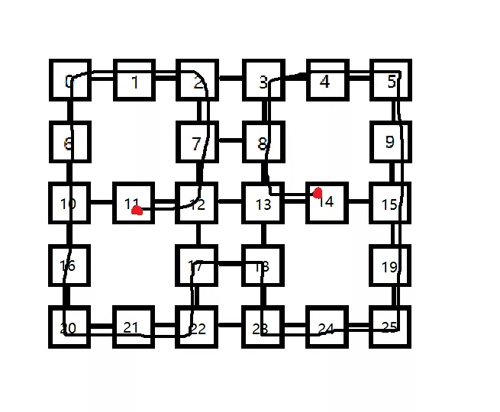

In [3]:
# 输入 test_data = ['010111', '111111', '111111', '111111', '001110']
# 输出表示连接关系的字典
def get_neighbor_pos(bool_matrix): # i行；j列；每个位置是否有的矩阵即get_matrix的输出
    width = len(bool_matrix[0])
    height = len(bool_matrix)
    all_box = "".join(bool_matrix)
    
    t = [int(i) for i in all_box]
    temp = 0
    for i in range(len(t)):
        if t[i] == 1:
            temp += 1
            t[i] = temp
    t = [t[i*width:(i+1)*width] for i in range(height)]

    
    # t: [[0, 1, 0, 2, 3, 4], 
    #     [5, 6, 7, 8, 9, 10], 
    #     [11, 12, 13, 14, 15, 16], 
    #     [17, 18, 19, 20, 21, 22], 
    #     [0, 0, 23, 24, 25, 0]]

    
    # 计算第i个元素的相邻元素是什么
    ajd_dict = dict()
    pos = 0
    for h in range(height):
        for w in range(width):
            if bool_matrix[h][w] == '1':
                its_neigh = []
                if w > 0 and bool_matrix[h][w-1] == '1': # 判断左边
                    its_neigh.append(t[h][w-1])
                if w < width - 1 and bool_matrix[h][w+1] == '1': # 判断右边
                    its_neigh.append(t[h][w+1])
                if h > 0 and bool_matrix[h-1][w] == '1': # 判断上边
                    its_neigh.append(t[h-1][w])
                if h < height - 1 and bool_matrix[h+1][w] == '1': # 判断下边
                    its_neigh.append(t[h+1][w])

                pos += 1
                ajd_dict[str(pos)] = [str(i) for i in its_neigh]
                
    return ajd_dict
#返回表示连接关系的字典。

In [4]:
def getPath(adj_dict, startPoint):
#     for akey in adj_dict:
    for akey in [str(startPoint)]:
        
        # 初始化
        path = [akey]
        
        path_dict = dict()
        path_dict[akey] = adj_dict[akey].copy()
        
        while len(path) > 0:
            if len(path_dict[akey]) > 0:
                temp = path_dict[akey].pop()
                if temp not in path:
                    akey = temp
                    path.append(akey)
                    path_dict[akey] = adj_dict[akey].copy()
                    if len(path) == len(adj_dict.keys()):
                        return path
            else:
                path_dict.pop(path.pop())
                if len(path) == 0:
                    break
                else:
                    akey = path[-1]

In [5]:
def moveFigure(path, pix_dict):
    for i in range(len(pix_dict)-1):
        from_to = [ pix_dict[int(path[i])][0],pix_dict[int(path[i])][1], pix_dict[int(path[i+1])][0],pix_dict[int(path[i+1])][1] ]
        swap = " ".join([str(i) for i in from_to])
        fing_cmd = "adb shell input swipe "+ swap +  " 30"

        os.system(fing_cmd)

In [95]:
# 这里是主函数
def main():
    os.system("adb shell screencap -p sdcard/screen.png")
    os.system("adb pull sdcard/screen.png ./")
    matrix_data, pix_dict, pos_dict, startPoint = get_matrix(190, 890, 595, 1330, 6, 6) # 读取上面的截图，并返回每个格子是否存在的布尔矩阵，每个格子的位置字典。
    # 参数分别对应于 left_x, right_x, up_y, down_y, matrix_x, matrix_y
    
    # matrix_data: ['010111', '111111', '111111', '111111', '001110']
    # matrix_data: ['0110', '1111', '1111']
    #matrix_data: ['111111', '101101', '111111', '101101', '111111']

    ajd_dict = get_neighbor_pos(matrix_data) # 获取邻接矩阵


    path = getPath(ajd_dict, startPoint) # 通过邻接矩阵找到一笔画路径
#     print(path)


    # 移动手指
    moveFigure(path, pix_dict)


In [101]:
main()